# 📊 EDA: Key Questions & Plots

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("logistics_shipments_feature_engineered.csv")

print(df.shape)
df.head()

(1932, 15)


,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,Cost_per_mile,Cost_per_kg,Ship_Month,Route
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2,0.231821,2.624903,10,Warehouse_MIA → San Francisco
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3,0.219469,6.911311,12,Warehouse_MIA → Atlanta
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2,0.337955,1.998656,9,Warehouse_LA → Houston
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,8,0.161799,4.390610,1,Warehouse_BOS → Seattle
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3,0.118004,15.191139,6,Warehouse_SF → Dallas


### Q1) What does the distribution of shipping cost look like?

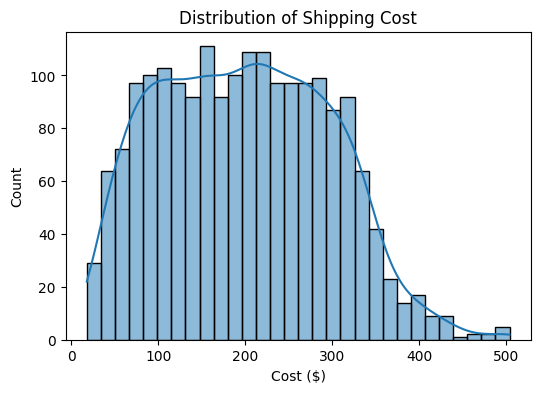

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df["Cost"], bins=30, kde=True)
plt.title("Distribution of Shipping Cost")
plt.xlabel("Cost ($)")
plt.ylabel("Count")
plt.show()

### Q2) How does shipping cost vary by carrier?

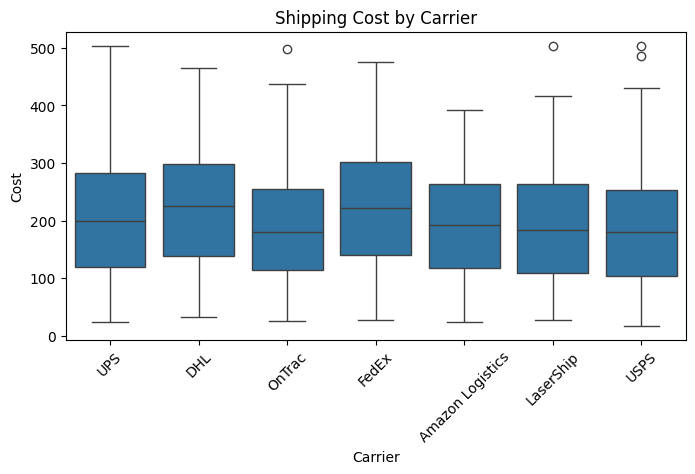

In [4]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Carrier", y="Cost", data=df)
plt.title("Shipping Cost by Carrier")
plt.xticks(rotation=45)
plt.show()

### Q3) Does shipping distance affect total cost?

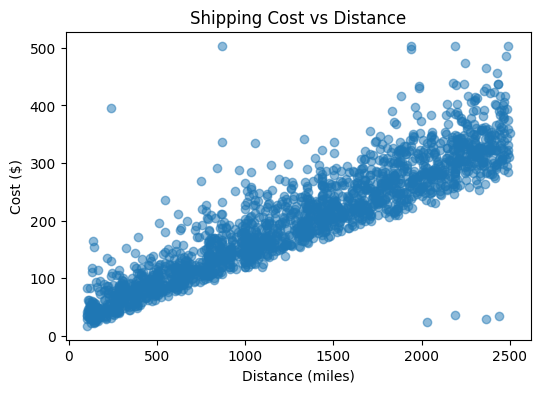

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df["Distance_miles"], df["Cost"], alpha=0.5)
plt.title("Shipping Cost vs Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Cost ($)")
plt.show()


### Q4) Are longer shipments more cost-efficient per mile?

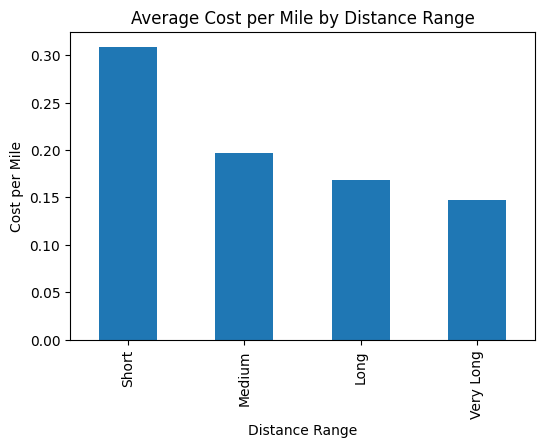

In [6]:
df["Distance_Bucket"] = pd.cut(
    df["Distance_miles"],
    bins=[0,300,700,1200,5000],
    labels=["Short","Medium","Long","Very Long"]
)

avg_cpm = df.groupby("Distance_Bucket")["Cost_per_mile"].mean()

plt.figure(figsize=(6,4))
avg_cpm.plot(kind="bar")
plt.title("Average Cost per Mile by Distance Range")
plt.xlabel("Distance Range")
plt.ylabel("Cost per Mile")
plt.show()

### Q5) How does transit time change with distance?

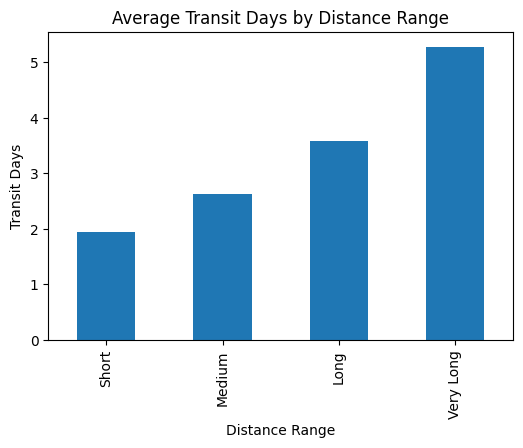

In [7]:
avg_transit = df.groupby("Distance_Bucket")["Transit_Days"].mean()

plt.figure(figsize=(6,4))
avg_transit.plot(kind="bar")
plt.title("Average Transit Days by Distance Range")
plt.xlabel("Distance Range")
plt.ylabel("Transit Days")
plt.show()


### Q6) What proportion of shipments are delivered vs delayed?

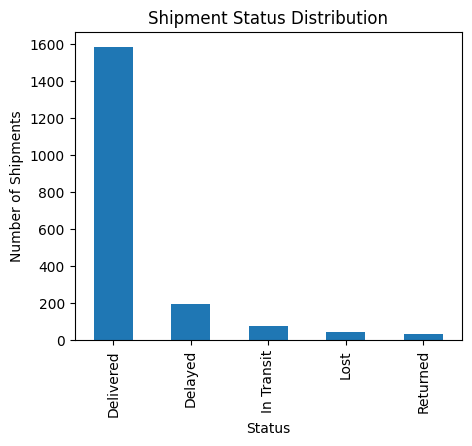

In [8]:
status_counts = df["Status"].value_counts()

plt.figure(figsize=(5,4))
status_counts.plot(kind="bar")
plt.title("Shipment Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Shipments")
plt.show()

My EDA focused on cost distribution, carrier-level differences, and distance-based efficiency patterns to support both dashboard insights and ML feature selection.